# Nilearn tutorial
This optional notebook is about the amazing [nilearn](https://nilearn.github.io/) Python package for applying statistical learning techniques (from GLMs to multivariate "decoding" and connectivity techniques) to neuroimaging data. In addition, it features all kinds of neat functionality like automic fetching of publicly available data, (interactive) visualization of brain images, and easy image operations.

In this tutorial, we'll walk you through the basic of the package's functionality in a step-by-step fashion. Notably, this notebook contains several exercises (which we call "ToDos"), which are meant to make this tutorial more interactive! Also, this tutorial is merely an introduction to (pars of) the Nilearn package. We strongly recommend checking out the excellent [user guide](https://nilearn.github.io/user_guide.html) and [example gallery](https://nilearn.github.io/auto_examples/index.html) on the Nilearn website if you want to delve deeper into the package's (more advanced) features.

### Contents
1. What is Nilearn?
2. Data formats
3. Data visualization
4. Image manipulation
5. Region extraction
6. Connectome/connectivity analyses

**Estimated time needed to complete**: 1-3 hours (depending on your experience with Python)<br>
**Credits**: if you end up using `nilearn` in your work, please cite the corresponding [article](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full).<br>

In [ ]:
# Let's see whether Nilearn is installed
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

## 1. What is Nilearn?
Nilearn is one of the packages in the growing ["nipy" ecosystem](https://nipy.org/) of Python packages for neuroimaging analysis (see also [MNE](https://mne.tools/stable/index.html), [nistats](https://nistats.github.io/), [nipype](https://nipype.readthedocs.io/en/latest), [nibabel](https://nipy.org/nibabel/), and [dipy](http://dipy.org/)). Specifically, Nilearn provides tools for analysis techniques like functional connectivity, multivariate (machine-learning based) "decoding", but also more "basic" tools like image manipulation and visualization.

<div class='alert alert-warning'>
    <b>ToDo</b>: Go through the <a href='https://nilearn.github.io/'>Nilearn</a> website to get an idea of what functionality the package offers. Also, for more information, check out <a href='https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full'>this article</a> about "machine learning for neuroimaging with scikit-learn", which discusses some of Nilearn's functionality in more detail.
</div>

On Nilearn's website, you can see that the package contains several modules (such as `connectome`, `datasets`, `decoding`, etc.). In the following sections, we will discuss some of them.

## 2. Data formats
Nilearn's functionality implicitly assumes that your MRI data is stored in nifti images. Many functions in Nilearn accept either strings pointing towards the path of a nifti file (or a list with multiple paths) or a `Nifti1Image` object from the `nibabel` package. Together, these two types of inputs (filenames pointing to nifti files and `nibabel` `Nifti1Images`) are often referred to a "niimgs" (or "niimg-like") by Nilearn &mdash; a term you'll see a lot in Nilearn's documentation (for more info about data formats in Nilearn, see [this explainer](https://nilearn.github.io/manipulating_images/input_output.html)).

Before we go on, let's actually download some example nifti files to work with. Fortunately, Nilearn has an entire module dedicated to fetching example data and other useful files (e.g., atlases): [nilearn.datasets](https://nilearn.github.io/manipulating_images/input_output.html#datasets). We'll import it below:

In [ ]:
from nilearn import datasets

Now, we will download some example data from the famous [Haxby et al.](https://science.sciencemag.org/content/293/5539/2425) (2001) study. This can be done using the `fetch_haxy` function from the `datasets` module. We'll download data from only a single subject for now.

In [43]:
import os
os.getcwd()

'/content'

In [44]:
# This might take a while, depending on your internet speed
data = datasets.fetch_haxby(
    data_dir=os.getcwd(),
    subjects=1,
    fetch_stimuli=False,
    verbose=1
)

<div class='alert alert-info'>
    <b>Note</b>: throughout this tutorial, you might see several warnings (in red) after running cells. The code is most likely executing perfectly fine (they are not errors!) and are often caused by other packages that Nilearn uses internally. 
</div>

The `fetch_haxby` function returns a dictionary with the location of the downloaded files and some metadata:

In [45]:
pprint(data)

{'anat': ['/content/haxby2001/subj1/anat.nii.gz'],
 'description': 'Haxby 2001 results\n'
                '\n'
                '\n'
                'Notes\n'
                '-----\n'
                'Results from a classical fMRI study that investigated the '
                'differences between\n'
                'the neural correlates of face versus object processing in the '
                'ventral visual\n'
                'stream. Face and object stimuli showed widely distributed and '
                'overlapping\n'
                'response patterns.\n'
                '\n'
                'Content\n'
                '-------\n'
                'The "simple" dataset includes\n'
                "    :'func': Nifti images with bold data\n"
                "    :'session_target': Text file containing session data\n"
                "    :'mask': Nifti images with employed mask\n"
                "    :'session': Text file with condition labels\n"
                '\n'
            

In [46]:
data['anat']

['/content/haxby2001/subj1/anat.nii.gz']

In [ ]:
data

In [47]:
data['description']

'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimuli showed widely distributed and overlapping\nresponse patterns.\n\nContent\n-------\nThe "simple" dataset includes\n    :\'func\': Nifti images with bold data\n    :\'session_target\': Text file containing session data\n    :\'mask\': Nifti images with employed mask\n    :\'session\': Text file with condition labels\n\n\nThe full dataset additionally includes\n    :\'anat\': Nifti images with anatomical image\n    :\'func\': Nifti images with bold data\n    :\'mask_vt\': Nifti images with mask for ventral visual/temporal cortex\n    :\'mask_face\': Nifti images with face-reponsive brain regions\n    :\'mask_house\': Nifti images with house-reponsive brain regions\n    :\'mask_face_little\': Spatially more constrained version of the above\n    :\'mask_house_little\

Let's inspect the `"description"` in more detail, which described the contents of the dictionary:

In [48]:
print(data['description'].decode("utf-8"))

AttributeError: ignored

Alright, now we have some data to work with. With the `image` module in Nilearn, we can load in and perform many different operations on nifti images. We'll import it below:

In [50]:
from nilearn import image

And let's load in the anatomical image from the Haxby dataset that we downloaded using the `load_img` function from the `image` module:

In [51]:
data

{'anat': ['/content/haxby2001/subj1/anat.nii.gz'],
 'description': 'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimuli showed widely distributed and overlapping\nresponse patterns.\n\nContent\n-------\nThe "simple" dataset includes\n    :\'func\': Nifti images with bold data\n    :\'session_target\': Text file containing session data\n    :\'mask\': Nifti images with employed mask\n    :\'session\': Text file with condition labels\n\n\nThe full dataset additionally includes\n    :\'anat\': Nifti images with anatomical image\n    :\'func\': Nifti images with bold data\n    :\'mask_vt\': Nifti images with mask for ventral visual/temporal cortex\n    :\'mask_face\': Nifti images with face-reponsive brain regions\n    :\'mask_house\': Nifti images with house-reponsive brain regions\n    :\'mask_face_little\': Spatial

In [52]:
anat_img = image.load_img(data['anat'])
print("The variable anat_img is an instance of the %s class!" % type(anat_img).__name__)

The variable anat_img is an instance of the Nifti1Image class!


In [58]:
print("The variable anat_img is an instance of the %s class!" % type(anat_img).__name__)

The variable anat_img is an instance of the Nifti1Image class!


Note that `load_img` is basically the same as the `nibabel` function `load`, but with some extra functionality (like loading in a list of files using [wildcards](https://techterms.com/definition/wildcard)) and checks (like whether it's really a nifti image).

<div class='alert alert-warning'>
    <b>ToDo</b>: In the <tt>subj1</tt> subdirectory of the download directory, there are multiple nifti files with "masks" outlining functional regions for this particular subject. Can you load them all at once using the <tt>load_img</tt> function with a wildcard? Store the result in a variable named <tt>all_mask_imgs</tt>, which should be a 4D <tt>Nifti1Image</tt> object. Don't forget to remove the <tt>NotImplementedError</tt>!
</div>

In [70]:
list(data).str['mask*']

AttributeError: ignored

In [67]:
data['mask*']

KeyError: ignored

In [60]:
all_mask_imgs = image.load_img(data['mask*'])

KeyError: ignored

In [ ]:
# Try it below!

# YOUR CODE HERE
raise NotImplementedError()

In [65]:
''' Tests the ToDo above. '''

# Check shape (should be 5 volumes)
assert(all_mask_imgs.shape == (40, 64, 64, 5))
print("Well done!")

NameError: ignored

In general, Nilearn contains several functions that can be seen as "wrappers" around common operations that you'd normally use `nibabel` and/or `numpy` for, such as creating new Nifti images from numpy arrays (`image.new_img_like`), indexing (4D) images (`image.index_img`), and averaging 4D images across time (`image.mean_img`). For example, suppose we have a 3D numpy array containing, e.g., $\hat{\beta}$ values from a GLM analysis with the same shape as our anatomical scan:

In [71]:
import numpy as np
arr_3d = np.random.normal(0, 1, size=anat_img.shape)
print("The variable arr_3d is an instance of the %s class!" % type(arr_3d).__name__)

The variable arr_3d is an instance of the ndarray class!


Now, suppose we want to convert this data to a `nibabel` `Nifti1Image` object, so that we can perform other operations on it or visualize it (using Nilearn). We can use the `new_img_like` function for this:

In [72]:
arr_3d_img = image.new_img_like(ref_niimg=anat_img, data=arr_3d)
print("The variable arr_3d_img is an instance of the %s class!" % type(arr_3d_img).__name__)

The variable arr_3d_img is an instance of the Nifti1Image class!


Before we go into more detail, let's make it a little bit more interesting by focusing on the data visualization tools within Nilearn.

## 3. Data visualization
The data visualization tools in Nilearn are grouped in the `plotting` module. The `plotting` module, in our opinion, is one of Nilearn's most useful features!

<div class='alert alert-warning'>
    <b>ToDo</b>: Before going on, browse through the Nilearn <a href="https://nilearn.github.io/plotting/index.html">documentation of the plotting module</a> to get a feel for what's possible.
</div>

Alright, let's start by importing the module (and telling Jupyter to plot our figures inside the notebook using `%matplotlib inline`):

In [73]:
from nilearn import plotting
%matplotlib inline

We can try plotting our `anat_img` (high-resolution T1-weighted image) using the `plot_anat` function. In the most basic approach, you can simply call it with your image (a `Nifti1Image` or path to a nifti file) as the first argument:

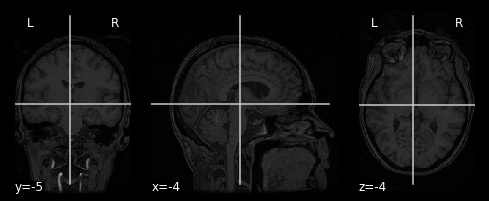

In [75]:
display = plotting.plot_anat(anat_img)

Note that the variable `display` is an instance of a custom Nilearn class (`Orthoslicer`) which contains some nifty (pun intended) features as well (which we won't discuss here, but check out Nilearn's [plotting reference](https://nilearn.github.io/plotting/index.html)).

But Nilearn plotting functions contain many (optional) arguments that you can use to customize your plot. For example, the `display_mode` argument allows you to plot the image in one (or more) particular dimensions (e.g., the "X" axis, which is usually sagittal) and the `cut_coords` argument allows you to specify the number (if integer) or locations of the particular slices/cuts (if list):

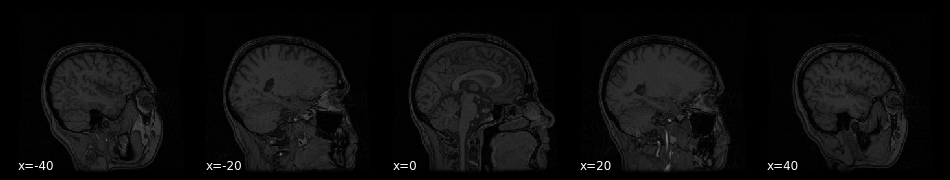

In [76]:
display = plotting.plot_anat(anat_img, display_mode='x', cut_coords=[-40, -20, 0, 20, 40])

<div class='alert alert-warning'>
    <b>ToDo</b>: Read through the <a href="https://nilearn.github.io/modules/generated/nilearn.plotting.plot_anat.html#nilearn.plotting.plot_anat">documentation</a> for the <tt>plot_anat</tt> function. Now, try to make the following plot of the <tt>anat_img</tt> image: 8 cuts in the "y" direction, thresholded at 50, a dimming factor of -1, and a title "T1-weighted image".
</div>

In [ ]:
# Implement your ToDo here
# YOUR CODE HERE
raise NotImplementedError()

There are many other plotting functions besides `plot_anat`, which we'll highlight when relevant in the next sections of this tutorial.

## 4. Image manipulation
Nilearn contains a lot of functionality to easily manipulate images. Note that, again, all of this could be implemented with `numpy` (in fact, Nilearn uses `numpy` "under the hood" for many of its operations); just see the Nilearn functions as "wrappers" around common numpy routines for nifti-based arrays (which also handle the updating of image affines, e.g. after resampling an image, appropriately). 

To showcase some `nilearn` functions, we'll use the functional MRI data we downloaded (`bold.nii.gz`).

In [78]:
func_img = image.load_img(data['func'][0])
print("Shape of functional MRI image: %s" % (func_img.shape,))

Shape of functional MRI image: (40, 64, 64, 1452)


This file, however, is quite large (~400 MB), as it contains concatenated data across 12 runs. To limit the amount of data that we need to load into RAM, we'll only load in the data from the first run. We can find out which volumes belong to which run in the "session_target" information, which we'll load in below as a [pandas dataframe](https://pandas.pydata.org/):

In [79]:
import pandas as pd
metadata = pd.read_csv(data['session_target'][0], sep=' ')
print("Shape of metadata dataframe: %s" % (metadata.shape,), end='\n\n')
print(metadata.head(20))

Shape of metadata dataframe: (1452, 2)

      labels  chunks
0       rest       0
1       rest       0
2       rest       0
3       rest       0
4       rest       0
5       rest       0
6   scissors       0
7   scissors       0
8   scissors       0
9   scissors       0
10  scissors       0
11  scissors       0
12  scissors       0
13  scissors       0
14  scissors       0
15      rest       0
16      rest       0
17      rest       0
18      rest       0
19      rest       0


Here, "chunks" refer to the specific run index and "labels" refers to the timepoint-by-timepoint condition (i.e., the condition of the active block at each moment in time, e.g., images of scissors, images of chairs, rest blocks, etc.). Let's compute the number of timepoints in the first "chunk" (run):

In [80]:
nvol_run_1 = np.sum(metadata['chunks'] == 0)
print("Number of volumes in run 1: %i" % nvol_run_1)

Number of volumes in run 1: 121


Alright, now we can use Nilearn's `index_img` function from the `image` module to index our `func_img` object.

In [81]:
to_index = np.arange(nvol_run_1, dtype=int)
func_img_run1 = image.index_img(func_img, to_index)
print("Shape of func_img_run1: %s" % (func_img_run1.shape,))

Shape of func_img_run1: (40, 64, 64, 121)


<div class='alert alert-warning'>
    <b>ToDo</b>: with the information in the header of <tt>func_img_run1</tt>, can you determine how long (in seconds) the first run lasted? Store the answer in a variable named <tt>length_run1</tt>.
</div>

In [ ]:
# Implement the ToDo here
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
assert(length_run1 == 302.5)

Okay, that was the boring part. Let's do some more interesting things!

### 4.1. Image mathematics
Nilearn provides some functions to make your life easier when doing array mathematics on 3D or 4D images. For example, the `mean_func` from the `image` module computes the mean across time for every voxel in a 4D image. (Note that, again, this could also be done in `numpy`.)

<div class='alert alert-warning'>
    <b>ToDo</b>: Use the <tt>mean_img</tt> function from the <tt>image</tt> module to average across the volumes of our <tt>func_img_run1</tt> image and store it in a new variable named <tt>mean_func</tt>.
</div>

In [ ]:
# Implement the ToDo here. 

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
assert(mean_func.shape == (40, 64, 64))
print("Well done!")

<div class='alert alert-warning'>
    <b>ToDo</b>: Now, plot the <tt>mean_func</tt> image using the <tt><a href="https://nilearn.github.io/modules/generated/nilearn.plotting.plot_epi.html#nilearn.plotting.plot_epi">plot_epi</a></tt> function from the <tt>plotting</tt> module. Use whatever arguments to make the plot as pretty as you like.
</div>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Another useful function from the `image` module is `math_img`. This function allows you to perform more complex  mathematical operations to entire images at once. For example, suppose you want to mean-center the time series of every voxel $v$ in an image (i.e., subtract the mean across time from each time point).

We can do that as follows using `math_img`:

In [82]:
mean_centered_img = image.math_img('img - np.mean(img, axis=3, keepdims=True)', img=func_img_run1)

As you can see, the function `math_img` takes a string indicating a particular (numpy) operation on the variable "img", which is given as an argument to the function. You can give as many extra arguments (associated with particular images) to the function as you'd like. For example, the above operation can also be performed as follows:

In [83]:
mean_centered_img = image.math_img('img_4d - img_mean[:, :, :, np.newaxis]', img_4d=func_img_run1, img_mean=mean_func)

NameError: ignored

<div class='alert alert-warning'>
    <b>ToDo</b>: Compute the voxelwise TSNR (mean across time divided by standard deviation across time for each voxel) of the <tt>func_img_run1</tt> image using <tt>math_img</tt> and store it in a variable <tt>tsnr_func</tt>. Then, plot the image using <tt>plot_epi</tt>.
</div>

In [ ]:
# Implement the ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [84]:
''' Tests the above ToDo. '''
np.testing.assert_almost_equal(
    tsnr_func.get_data()[20, 30, 30],
    64.76949,
    decimal=5
)
print("Well done!")

NameError: ignored

### 4.2. Image preprocessing
Nilearn also provides some functionality for basic preprocessing of (functional) images. Note the adjective "basic" &mdash; most preprocessing steps (such as image registration, motion correction, susceptibility distortion correction, etc.) should be done using other packages (for which we strongly recommend [Fmriprep](https://fmriprep.readthedocs.io/)). That said, Nilearn does provide some preprocessing functionality, such as smoothing (with `image.smooth_img`):

In [85]:
tsnr_func_smooth = image.smooth_img(tsnr_func, fwhm=10)
display = plotting.plot_epi(tsnr_func_smooth);

NameError: ignored

Hmm, perhaps it would be nicer to plot a thresholded version of this map on the subject's high-resolution T1-weighted scan ... Of course, Nilearn has a function for that: `plot_stat_map`, which takes both a "stat_map" (which can be anything, as long as it's a 3D image) and a background image, as well as an optional threshold argument:

In [ ]:
display = plotting.plot_stat_map(tsnr_func_smooth, bg_img=anat_img, threshold=150)

Note that you can even create interactive image viewers using, for example, the `view_img` function. This works especially well in Jupyter notebooks. Importantly (at least in Jupyter notebooks), you should call this plotting function at the end of the code cell and you should not assign the output of the function to a new variable, otherwise the viewer won't render.

In [ ]:
# Do not add code after this line, otherwise it won't work
plotting.view_img(tsnr_func_smooth, bg_img=anat_img, threshold=150)

<div class='alert alert-warning'>
    <b>ToDo</b>: Try moving the crosshairs in the image!
</div>

While these interactive viewers are amazing, be careful not to open too many of them, as they need quite a bit of memory to run!

<div class='alert alert-warning'>
    <b>ToDo</b>: Time for a slightly harder ToDo. The <tt>masking</tt> module of Nilearn contains a function <tt>compute_epi_mask</tt> (see <a href="https://nilearn.github.io/modules/generated/nilearn.masking.compute_epi_mask.html#nilearn.masking.compute_epi_mask">docs</a>), which computes a binary brain mask (similar to FSL's <tt>bet</tt>) on a 3D functional image (usually the mean functional image). Do this for our <tt>mean_func</tt> image (store it in a variable named <tt>func_mask</tt>) and plot the mask on top of the <tt>mean_func</tt> image (i.e., the background) using the <tt>plot_roi</tt> function from the <tt>plotting</tt> module.<br>
    
Don't forget to import the <tt>masking</tt> module!
</div>

In [ ]:
# Implement your ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
assert(func_mask.get_data().sum() == 23594)
print("Well done!")

In addition to spatial smoothing and creating (functional) brain masks, Nilearn actually also provides some tools for preprocessing in the time domain (such as detrending, 

### 4.3. Image masking
A common operation in fMRI analyses is *masking*: extracting particular voxels from the entire dataset, usually based on a binary brain mask (like you computed in the previous ToDo). Masking, at least in fMRI analyses, is often done on the spatial dimensions of 4D images; as such, masking can be seen as a operation that takes in a 4D image with spatial dimensions $X \times Y \times Z$ and temporal dimension $T$ and returns a $T \times K$ 2D array, where $K$ is the number of voxels that "survived" (for lack of a better word) the masking procedure.

Reasons to mask your data could be, for example, to exclude non-brain voxels (like in skullstripping) or to perform confirmatory region-of-interest (ROI) analyses, or to extract one or multiple "seed regions" for connectivity analyses.

Nilearn provides several functions and classes that perform masking, which differ in how extensive they are (some only perform masking on a single image, others do this for multiple images at the same time, and/or may additionally perform preprocessing steps). Importantly, all take in a 4D niimg-like object and return a 2D *numpy array*. 

We'll first take a look at the most simple and low-level implementation: `apply_mask`. This function takes in a 4D image (which will be masked), a *binary* 3D image (i.e., with only zeros and ones, where ones indicate that they should be included) as mask, and optionally a smoothing kernel size (FWHM in millimeters) and returns a masked 2D array. Let's do this for our data (`func_img_run1`) using the brain mask (`func_mask`) you computed earlier:

In [ ]:
from nilearn import masking

# Let's compute the epi mask again, in case you didn't do this in the previous ToDo
func_mask = masking.compute_epi_mask(mean_func)

print("Before masking, our data has shape %s ..." % (func_img_run1.shape,))
func_masked = masking.apply_mask(func_img_run1, func_mask)
print("... and afterwards our data has shape %s and is a %s" % (func_masked.shape, type(func_masked).__name__))

Importantly, we can "undo" the masking operation by the complementary `unmask` function:

In [ ]:
func_unmasked = masking.unmask(func_masked, func_mask)
print("func_unmasked is a %s and has shape %s" % (type(func_unmasked).__name__, func_unmasked.shape))

<div class='alert alert-warning'>
    <b>ToDo</b>: Similar to what we did before, mask the <tt>func_img_run1</tt> file with the <tt>func_mask</tt> file. Then, compute for every voxel its TSNR (with numpy, because we're dealing with a numpy array after masking!) and set all voxels with a TSNR lower than 100 to 0. Then, unmask the data again and save it (i.e., the <tt>Nifti1Image</tt>) in a variable named <tt>tsnr_masked_img</tt>
</div>

In [ ]:
# Implement your ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
'''Tests the above ToDo. '''
tmp_test = tsnr_masked_img.get_data()

np.testing.assert_array_equal(
    tmp_test[30, 30, 30, :5],
    np.array([1695., 1712., 1690., 1695., 1711.])
)

np.testing.assert_array_equal(
    tmp_test[20, 30, 30, :],
    np.zeros(tmp_test.shape[-1])
)

print('Well done!')

Apart from the `apply_mask` and `unmask` functions, Nilearn also contains a more extensive "masking" class, `NiftiMasker` (from the `input_data` module), that has some extra preprocessing features. Unlike the name suggests, this class does much more than masking: it also (optionally) allows you to spatially and temporally preprocess your data! It works slightly differently than the relatively simple functions we have discussed so far though, so we'll spend a little time on its "mechanics".

We'll start with importing it:

In [ ]:
from nilearn.input_data import NiftiMasker

Importantly, `NiftiMasker` is *not* a function, but a (custom) *class*. With this class, you can create (or "initialize") a new object of this class. Upon inialization, you can give it particular arguments that define how the `NiftiMasker` object will behave. Read through the [documentation](https://nilearn.github.io/modules/generated/nilearn.input_data.NiftiMasker.html#nilearn.input_data.NiftiMasker) of the `NiftiMasker` class to see which arguments it accepts.

For now, we'll initialize a very simple `NiftiMasker` that only accepts a particular brain mask (and set `verbose=True` to print some extra information).

In [ ]:
masker = NiftiMasker(mask_img=func_mask, verbose=True)
print("The masker variable is a %s object" % type(masker).__name__)

Realize that we haven't masked anything, yet! We can do this using the `fit` and `transform` methods of `NiftiMasker` objects. This "design" (i.e., custom objects with `fit` and `transform` methods that implement data transformations) is based on the design principles of the [scikit-learn](https://scikit-learn.org/stable/) Python package for machine learning (some of the authors of the Nilearn package also created and contribute to the `scikit-learn` package).

Now, after initialization of the `NiftiMasker` object, you need to call the `fit` method, which needs the to-be-transformed (here: masked) 4D image as an input:

In [ ]:
masker.fit(func_img_run1)

In the output block of the cell above (`Out[xx]`), you can see that the `fit` function returns "itself" (i.e., the `NiftiMasker` object). Importantly, any computations are happening "in-place", so the output (i.e., the object itself) does not need to be stored in a new variable.

Moreover, because we set `verbose=True`, some extra information about what the `NiftiMasker` does is printed (first, the data from `func_img_run1` is loaded in memory and, second, the `func_mask` is resampled to the same space as the `func_img_run1` if necessary).

Again, even after calling `fit`, our 4D data not been masked yet! The fitting procedure only makes sure that the `NiftiMasker` object is ready to transform whatever image you want (later, when you call `transform`). You might think, "why do you need a `fit` method, if it is not actually 'fitting' anything?" In this example, it is indeed redundant, but there are many other features in the `NiftiMasker` class that actually perform some computation. For example, we could initialize a `NiftiMasker` object without an explicit `mask_img`, but with the argument `mask_strategy='epi'`, which will actually compute a functional brain mask when you will call `fit`:

In [ ]:
masker2 = NiftiMasker(mask_strategy='epi', verbose=1)
masker2.fit(func_img_run1);

Here, you see that the computation of the mask is happening when we called `fit`. In general, this design pattern &mdash; which defers any computation to a particular method (here: `fit`) and uses a different method (e.g., `transform`) for the actual transformation &mdash; is ideal for *cross-validation*. Cross-validation is a procedure where you want to use separate subsets of your data for *estimating* (fitting) parameters or operations and actually *applying* those parameters or operations, which is common in, for example, machine learning. 

Anyway, we are digressing. After calling `fit`, we can now call the `transform` method with the image that we want to transform (here: mask) as input, which will return the masked image:

In [ ]:
# would be the same for the masker2 object
masked_file = masker.transform(func_img_run1)
print("\nThe variable masked_file is an instance of the %s class," % type(masked_file).__name__)
print("with shape %s" % (masked_file.shape,))

Note that `transform` again need the to-be-transformed image (here: `func_img_run1`) as input, but this could have been any other 4D image (as long as it has the same dimensions)!

To make your life a little easier, `NiftiMasker` objects also contain another function, `fit_transform`, that (guess what) combines the `fit` and `transform` methods in a single method:

In [ ]:
masked_file = masker.fit_transform(func_img_run1)

<div class='alert alert-warning'>
    <b>ToDo</b>: One of the extra preprocessing features that <tt>NiftiMasker</tt> objects contain is spatial smoothing. Create a new <tt>NiftiMasker</tt> object that will smooth the <tt>func_img_run1</tt> image (with a FWHM of 7 mm.) as well as mask it using the "epi" strategy. Store the result in a new variable named <tt>smooth_and_masked_file</tt>. Check the <a href="https://nilearn.github.io/modules/generated/nilearn.input_data.NiftiMasker.html#nilearn.input_data.NiftiMasker">docs</a> for more information.
</div>

In [ ]:
# Implement your ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
np.testing.assert_array_almost_equal(
    smooth_and_masked_file[0, :5],
    np.array([782.5649 , 849.7041 , 775.19464, 824.16406, 847.68823]),
    decimal=4
)
print("Well done!")

You might think that this "workflow" using `NiftiMasker` objects is a bit cumbersome. For very simple operations, it is (relative to just using, e.g., the `apply_mask` function), but the initialize-fit-transform pattern allows for easy integration with other common (machine-learning related) transformations as implemented in the `scikit-learn` package (which we won't discuss here, but check [this page](https://nilearn.github.io/building_blocks/manual_pipeline.html) for more information).

We'll take a look at the more extensive functionality (including temporal preprocessing) of `NiftiMasker` at the end of the next section.

### 4.4. Temporal preprocessing
Nilearn contains some basic temporal preprocessing functionality, such as ...
* detrending (removing a linear trend);
* standardization (normalizing the signal with mean 0 and standard deviation 1);
* high- and low-pass filtering;
* generic confound removal (using linear regression)

Again, there are different interfaces for these operations. The most "basic" ones are `signal.clean` and `image.clean_img`, which are very similar except for that `signal.clean` works on 2D numpy arrays while `image.clean_img` work on 4D "niimg-like" objects. Also, these temporal preprocessing operations can be done using `NiftiMasker` objects.

For now, we'll focus on the `image.clean_img` interface. 

<div class='alert alert-warning'>
    <b>ToDo</b>: Read through the <a href="https://nilearn.github.io/modules/generated/nilearn.image.clean_img.html#nilearn.image.clean_img">documentation</a> of the <tt>clean_img</tt> function.
</div>

As you can see, the function has a mandatory argument, `imgs`, referring to the to-be-cleaned image (or images, if it's a list of 4D images) and several optional arguments referring to the different preprocessing options. Below, we'll use the function to detrend, standardize, and high-pass (but not low-pass) the `func_img_run1` data:

In [ ]:
# Note that high_pass should be defined in Hz (here: 1/100) and
# the t_r (time to repetition) parameter is necessary for the high-pass filter

# This may take a couple of seconds!
func_clean = image.clean_img(func_img_run1, detrend=True, standardize=True, high_pass=0.01, t_r=2.5)
print("func_clean is an instance of the %s class!" % type(func_clean).__name__)

Additionally, the `clean_img` (and `signal.clean`) also allow you to filter out confounds such as motion parameters, physiological traces (e.g., RETROICOR traces), or data-derived noise sources such as the timecourses from "high-variance" voxels). 

To get some example confound variables, let's actually extract the timecourses of "high-variance" voxels within our data (`func_img_run1`), which can be done using the [image.high_variance_confounds](https://nilearn.github.io/modules/generated/nilearn.image.high_variance_confounds.html#nilearn.image.high_variance_confounds) function. Subsequently, we can regress out these timecourses (confounds) from our data using `image.clean_img`.

<div class='alert alert-warning'>
    <b>ToDo</b>: Read through the <a href="https://nilearn.github.io/modules/generated/nilearn.image.high_variance_confounds.html#nilearn.image.high_variance_confounds">docs</a> of the <tt>high_variance_confounds</tt> function. Then, extract 10 time courses from the highest-variance voxels and store this in a new variable named <tt>hvar_confs</tt>. Make sure to actually use the <tt>func_mask</tt> variable as a mask during the high-variance confound estimation (see the <tt>mask_img</tt> argument) to exclude voxels outside the brain. Lastly, regress out the confounds from the <tt>func_img_run1</tt> image (using the argument <tt>confounds</tt>). Make sure to also detrend, standardize, and high-pass (with 0.01 Hz) the data. Store the cleaned data in a variable named <tt>func_clean</tt>.
</div>

In [ ]:
# Implement your ToDo here (might take a couple of seconds to run)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
np.testing.assert_array_almost_equal(
    func_clean.get_data()[30, 30, 30, :5],
    np.array([-0.12187857, 1.3470134, -0.70243245, -0.442845, 0.9848256]),
    decimal=5
)
print("Well done!")

As mentioned before, the `NiftiMasker` also allows you to temporally preprocess your data (including confound removal)! Note that in the `NiftiMasker` implementation the `confounds` (2D numpy array with confound time series) should be given as an argument during `fit` (not as an argument during initialization).

<div class='alert alert-warning'>
    <b>ToDo</b>: Try to redo the last ToDo exercise, but this time using the <tt>NiftiMasker</tt> implementation. Store the cleaned image (which should be a 2D numpy array) in a new variable named <tt>func_clean2</tt>.
</div>

In [ ]:
# Implement the ToDo here (might take a couple of seconds to run)

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the ToDo above. '''
np.testing.assert_array_almost_equal(
    func_clean2[:5, 5000],
    np.array([ 0.04785081,  0.4619908 ,  0.88480663, -0.01620996, -0.29138982]),
    decimal=5
)
print("Well done!")

## 5. Region extraction
A common operation in fMRI analyses is to reduce the dimensionality of the data by restricting your analyses to one or more regions-of-interest (ROIs), which may be either functionally or anatomically (using atlases) defined. While this is, technically, a form of masking (and could have been discussed in section 4.3), we wanted to discuss this topic in a separate section as Nilearn has a dedicated module &mdash; [regions](https://nilearn.github.io/modules/reference.html#module-nilearn.regions) &mdash; for region extraction.

Before we go into more detail, we need some other data, because the Haxby data is in "native" functional space, but anatomical atlases are usually defined in some standard space (usually a variant of the MNI152 space). Below, we'll load in data from a single subject from a study by [Hilary Richardson and colleagues](https://www.nature.com/articles/s41467-018-03399-2) (2018), in which participants watched the same short movie. Note that the data was preprocessed already using the [Fmriprep](https://fmriprep.readthedocs.io/en/stable/) software package. Again, we can use a function from the `datasets` module (`fetch_development_fmri`) to download the data. Also, we'll remove our previously defined variables to clear up some memory by the "magic" command `% reset`.

In [ ]:
%reset -f

# And redefine imports
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from nilearn import datasets, image, masking, plotting
%matplotlib inline

In [ ]:
data = datasets.fetch_development_fmri(n_subjects=1, reduce_confounds=True, age_group='adult')
pprint(data)

Let's take a look at the description in more detail:

In [ ]:
print(data['description'].decode('utf-8'))

The advantage of this dataset (for our purposes) is that the functional data is already aligned to the MNI152 template. We'll first load in the data:

In [ ]:
func_img = image.load_img(data['func'][0])
print("Shape of func_img: %s" % (func_img.shape,))

Note that the functional data, as expected, is a 4D image (with 168 volumes). We can verify that it's aligned by plotting the (by Nilearn computed) brain mask on top of the MNI template (which is the default background image in the `plot_roi` function):

In [ ]:
func_mean = image.mean_img(func_img)
display = plotting.plot_roi(func_mean)

Note that the voxel dimensions of our `func_img` data ($50 \times 59 \times 50$) are different from the standard MNI (2mm) template ($91 \times 109 \times 91$) &mdash; how, then, is Nilearn able to plot these images on top of each other? This is because, "under the hood", Nilearn resamples our data (`func_img`) to the dimensions of the MNI template (using the function [image.resample_to_img](https://nilearn.github.io/modules/generated/nilearn.image.resample_to_img.html#nilearn.image.resample_to_img)). We'll take a closer look at this function later in this tutorial.

Anyway, it seems that our functional data aligns quite well with the MNI template (apart from some signal dropout in inferior temporal and orbitofrontal cortex, which is normal).

### Intermezzo: surface plots
Because our data is aligned to standard MNI152 space, we can use another cool visualization feature from Nilearn: surface plots! Nilearn contains the resampling parameters (as available from the [Freesurfer](https://surfer.nmr.mgh.harvard.edu/) software package) necessary to resample volumetric images in MNI space to the corresponding "fsaverage" surface space. To do so, you can use the `view_img_on_surf` function, which takes a volumetric image (`img`) and projects it on a corresponding surface (`surf`).

We'll use the "fsaverage5" `surf_mesh` specifically, because it is in a slightly lower resolution than the default "fsaverage" space (saving some memory):

In [ ]:
plotting.view_img_on_surf(
    stat_map_img=func_mean,
    surf_mesh='fsaverage5'
)

<div class='alert alert-warning'>
    <b>ToDo</b>: Check out different views of the surface by dragging it left/right/up/down with your mouse and zooming in (with the scroll wheel of your mouse or your trackpad). Also try switching hemispheres and surface type (Inflated vs. Pial) using the buttons on the bottom of the plot.
</div>

Note that you could also project your data on the subject's own surface reconstruction (instead of "fsaverage") if you have that (and assuming whatever data you want to project is actually aligned to your subject's high-resolution T1-weighted scan)!

### 5.1. "Labels" vs. "maps" atlas images
In Nilearn, there is a distinction between "atlas maps images" and "atlas label images". 

#### 5.1.1. Atlas label images
In atlas label images, there is only a single image containing different integer "labels" ($1, 2, 3, ... R$) corresponding to different brain regions within a particular atlas. Importantly, these different regions do not overlap in atlas label images.

We'll download and load in such an atlas below, the "maxprob" version of the Harvard-Oxford Cortical atlas (using `datasets.fetch_atlas_harvard_oxford`):

In [ ]:
from nilearn import regions
ho_maxprob_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

Note that the Harvard-Oxford atlas is, technically, a probabilistic atlas, where each voxel (often) is assigned a set of probabilities of belonging to different region (e.g., voxel $x$ may belong with 80% "certainty" to the right amygdala and 20% "certainty" to the right hippocampus). Here, however, we loaded in the "maxprob" version, which, for each voxel, assigns the region with the highest probability.

Here, the `ho_maxprob_atlas` variable is a dictionary with the keys "labels" and "maps":

In [ ]:
pprint(ho_maxprob_atlas)

Let's load in the actual atlas image:

In [ ]:
ho_maxprob_atlas_img = image.load_img(ho_maxprob_atlas['maps'])
print("ho_maxprob_atlas_img is a 4D image with shape %s" % (ho_maxprob_atlas_img.shape,))

The actual values of this map are integers that indicate which region the corresponding voxels belong to:

In [ ]:
region_int_labels = np.unique(ho_maxprob_atlas_img.get_data())
n_regions = region_int_labels.size

print("There are %i different regions in the Harvard-Oxford cortical atlas!" % n_regions)

But how do we know which number belongs to which region? Basically, the *index* of the labels (in `ho_maxprob_atlas['labels']`) correspond to the values in the map (`ho_maxprob_atlas_img`). For example, the value "2" in the atlas map corresponds to the third (remember, Python is 0-indexed) label:

In [ ]:
idx = 2
region_with_value2 = ho_maxprob_atlas['labels'][idx]
print("The region with value 2 is: %s" % region_with_value2)

<div class='alert alert-warning'>
    <b>ToDo</b>: Which region belongs to the value "10" in the atlas map? Check the cell above with <tt>pprint(ho_maxprob_atlas)</tt> to verify your answer.
</div>

<div class='alert alert-warning'>
    <b>ToDo</b>: Can you compute how many voxels the "Insular cortex" consists of within this atlas? Hint: you need to load the atlas map (<tt>ho_maxprob_atlas_img</tt>) into memory (using the <tt>get_data</tt> method) for this. Store the answer (an integer) in a new variable named <tt>nvox_insula</tt>.
</div>

In [ ]:
# Implement the ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
assert(int(nvox_insula) == 2341)
print("Well done!")

<div class='alert alert-warning'>
    <b>ToDo</b>: Now, let's try it the other way around! What value in our atlas map belongs to the region "Occipital Fusiform Gyrus"? Try it programatically (i.e., without counting the regions in <tt>ho_maxprob_atlas['labels']</tt>. Store the value in a new variable named <tt>value_ofg</tt>. Hint: perhaps you can use the list method <a href="https://www.programiz.com/python-programming/methods/list/index">index</a>.
</div>

In [ ]:
# Implement the ToDo here

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo'''
assert(value_ofg == 40)
print("Well done!")

We can actually plot the atlas easily using the function `plot_roi`:

In [ ]:
display = plotting.plot_roi(ho_maxprob_atlas_img, colorbar=True)

#### 5.1.2. Atlas maps images
In atlas maps images, the regions are not defined by single labels (such as in probabilistic atlases) and may overlap. An example of such as atlas map image is the original *probabilistic* version of the Harvard-Oxford atlas:

In [ ]:
ho_prob_atlas = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
pprint(ho_prob_atlas)

Again, this atlas (contained in the variable `ho_prob_atlas`) contains both *labels* (`ho_prob_atlas['labels']`) and *maps* (`ho_prob_atlas['maps']`), like with the "maxprob" atlas, but this time, the *maps* image is a 4D image:

In [ ]:
ho_prob_atlas_img = image.load_img(ho_prob_atlas['maps'])
print("ho_prob_atlas_img has shape %s" % (ho_prob_atlas_img.shape,))

In this `ho_prob_atlas_img`, the fourth dimension now refers to the different regions! Note that there are only 48 volumes because the "background" does not get it's own volume. Now, suppose that I would like to extract the volume corresponding to the insula (label nr. 3), we need to extract the *first* volume (this is because the background did get its own volume; a bit confusing, we know):

In [ ]:
insula_prob_roi = image.index_img(ho_prob_atlas_img, 1)
print("Shape of insula ROI: %s" % (insula_prob_roi.shape,))

Again, we can plot this using `plot_roi`:

In [ ]:
display = plotting.plot_roi(insula_prob_roi, cmap='autumn', vmin=0)

<div class='alert alert-warning'>
    <b>ToDo</b>: Because the insula ROI (<tt>insula_prob_roi</tt>) is in MNI152 space, you can also visualize it in a surface plot. Try to use the <tt>view_img_on_stat</tt> function to do so (with, e.g., a threshold of 20).
</div>

In [ ]:
# Plot the insula ROI on the fsaverage5 surface here
# YOUR CODE HERE
raise NotImplementedError()

Alright, back to volume plots. Nilearn contains even a function to plot the entire probabilitic atlas (given some threshold) in a single plot: `plot_probabilistic_atlas`.

In [ ]:
# This may take a couple of seconds
display = plotting.plot_prob_atlas(ho_prob_atlas_img, colorbar=True, threshold=10)

At this moment, we could use our insula ROI (after binarizing) to index our functional data (`func_img`), except that we have one problem: although the ROI (`insula_prob_roi`) and our data (`func_img`) are aligned, they do not have the same dimensions:

In [ ]:
print("Affine of func_img:")
print(func_img.affine)

print("\nAffine of ROI:")
print(insula_prob_roi.affine)

Again, Nilearn comes to the rescue! We can use `image.resample_img` (or alternatively, `image.resample_to_img`) to resample our ROI to the resolution of our functional data. Check out the [docs](https://nilearn.github.io/modules/generated/nilearn.image.resample_img.html) of the `resample_img` function!

(Note that we didn't have to do this when we plotted our insula ROI on top of an MNI image background, because most plotting functions in Nilearn automatically resample the to-be-plotted data to the background image "under the hood".)

<div class='alert alert-info'>
    <b>ToThink</b>: Why do you think we choose to resample our ROI to our data and not the other way around (which is also perfectly possible)? Think about practical reasons!
</div>

Let's do this below:

In [ ]:
insula_prob_roi_resamp = image.resample_img(
    insula_prob_roi,
    target_affine=func_img.affine,
    target_shape=func_img.shape[:3]
)

print("New affine of ROI:")
print(insula_prob_roi_resamp.affine)

<div class='alert alert-warning'>
    <b>ToDo</b>: Alright, time for a slightly more extensive ToDo! Try the following:<br>

<ul>
    <li>
        Extract the probabilistic ROI of the "Temporal Pole" from the <tt>ho_prob_atlas_img</tt> variable (plot it         with <tt>plot_roi</tt> to see whether you succeeded);
    </li>
    <li>
        Using the function <a href="https://nilearn.github.io/modules/generated/nilearn.image.threshold_img.html">image.threshold_img</a>,   
        threshold the probabilistic ROI at 40 (setting all voxels with the value 40 and below to zero);
    </li>
    <li>
        Resample the thresholded mask to the dimensions of our functional data (<tt>func_img</tt>);
    </li>
    <li>
        Using <tt>image.math_img</tt>, binarize the thresholded and resampled ROI (where voxels belonging to the 
        thresholded ROI should have value 1 and 0 otherwise);
    <li>
        Finally, apply this mask to the <tt>func_img</tt> variable using <tt>apply_mask</tt> (or 
        <tt>NiftiMasker</tt>, up to you);
    </li>
    <li>
        Average the time series signal across the 1043 temporal pole voxel and store these values (should be an 
        array of 176 values) in a new variable named <tt>average_tp_signal</tt>.
</ul>
</div>

In [ ]:
# Implement your ToDo here!

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
''' Tests the above ToDo. '''
np.testing.assert_array_almost_equal(
    average_tp_signal[:5],
    np.array([299.29, 299.42, 299.26, 299.89, 298.79]),
    decimal=2
)
print("Well done!")

If you did the previous ToDo, you noticed it took quite some lines of code to implement (but way less that you'd need when implementing it in pure Numpy!). This would take even more lines of code if you would like to do this for multiple ROIs, for example, in "connectome"-based analyses (which we'll discuss in a bit). Fortunately, Nilearn contains several functions do this within a single line of code.

There are different functions for "atlas maps images" (such as for our probabilistic Harvard-Oxford atlas) and "atlas label images" (such as our "maxprob" Harvard-Oxford atlas). The corresponding functions that allow multi-ROI masking and averaging the signal across voxels (like you did in the previous ToDo) are `img_to_signals_labels` and `img_to_signals_maps` from the `regions` module, respectively. Both transform a 4D ($X \times Y \times Z \times T$) image to a 2D ($T \times K$, where $K$ is the number of regions in the atlas) numpy array.

Let's take a look at the `img_to_signals_labels` function first. We'll use our previously defined `ho_maxprob_atlas_img`. Importantly, we first need to resample the atlas label image to the space of our functional data (we'll use `resample_to_img` this time, which is a little less "verbose" than the `resample_img` function):

In [ ]:
ho_maxprob_atlas_img_resamp = image.resample_to_img(
    ho_maxprob_atlas_img,
    target_img=func_img,
    interpolation='nearest'
)

Note that we specify that the resampling function should use "nearest neighbor" interpolation instead of the default "continuous" interpolation (otherwise labels at the edge of regions could get a value of, e.g., 3.05, while labels in atlas label images should always be whole numbers/integers).

Now, in a single line of code (`using_, we can transform our 4D image to a 2D array with the average time series (i.e., across voxels) for all ROIs in our atlas:

In [ ]:
av_roi_data = regions.img_to_signals_labels(
    func_img,
    labels_img=ho_maxprob_atlas_img_resamp,
    background_label=0
)

Notably, the `img_to_signals_labels` returns two things:
1. The actual average ROI signals;
2. The corresponding (integer) labels

In [ ]:
av_roi_signals = av_roi_data[0]
roi_labels = av_roi_data[1]
print("average_roi_signals is a %s with shape: %s" % (type(av_roi_signals).__name__, av_roi_signals.shape))

The function for atlas maps images (`img_to_signals_maps`) can be used in essentially the same way as the `img_to_signals_labels` function, except that it should be given a atlas maps image instead.

By the way, there exists variations of the `NiftiMasker` class that basically does the same as the `img_to_signals_{labels,maps}` functions: `NiftiLabelsMasker` and `NiftiMapsMasker`. Just like the `img_to_signals_labels` function, this indexes our functional data with multiple ROIs in which the signal is subsequently averaged across voxels, but it also includes resampling of the atlas (if necessary) and optional preprocessing (just like the `NiftiMasker` class).

We'll show you how it can be used on our data below:

In [ ]:
from nilearn.input_data import NiftiLabelsMasker

nlm = NiftiLabelsMasker(labels_img=ho_maxprob_atlas_img)
av_roi_signals = nlm.fit_transform(func_img)
print("Shape of av_roi_signals: %s" % (av_roi_signals.shape,))

Alright, now you know how to leverage the basic functionality from the `regions` module. Note that, in addition to the several existing anatomically and functionally defined atlases (check out the [datasets](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets) module), Nilearn also contains several wrapper functions for `scikit-learn` functions that allow you to estimate parcellations from your *own* data (using, e.g., [Ward clustering](https://nilearn.github.io/modules/generated/nilearn.regions.Parcellations.html#nilearn.regions.Parcellations), [Kmeans clustering](https://nilearn.github.io/modules/generated/nilearn.regions.Parcellations.html#nilearn.regions.Parcellations), [Dictionary learning](https://nilearn.github.io/modules/generated/nilearn.decomposition.DictLearning.html#nilearn.decomposition.DictLearning) or [canonical ICA](https://nilearn.github.io/modules/generated/nilearn.decomposition.CanICA.html#nilearn.decomposition.CanICA)). But that's something for another tutorial perhaps.

## 6. Connectome/connectivity analyses
When we have a 2D array with average time series of multiple ROIs, we can easily implement a "[connectome](https://en.wikipedia.org/wiki/Connectome)"-based analysis using the [connectome](https://nilearn.github.io/modules/reference.html#module-nilearn.connectome) module of Nilearn. This module has several functions/classes that allow you to estimate "functional connectomes", which are basically connectivity matrices based on a similarity measure (such as correlation) between time series across ROIs. As such, these matrices have a $K \times K$ shape (where $K$ reflects the number of ROIs). From these connectivity matrices, in turn, you could for example perform [network analyses](https://www.frontiersin.org/articles/10.3389/fncom.2014.00051/full).

There are different classes for connectome estimation, including `ConnectivityMeasure` (a general-purpose connectivity estimator), `GroupSparseCovariance` and `GroupSparseCovarianceCV` (estimators for specific "sparse" connectivity matrices across multiple subjects).

For now, we'll focus on the general `ConnectivityMeasure` class. We'll start by importing it:

In [ ]:
from nilearn.connectome import ConnectivityMeasure

<div class='alert alert-warning'>
    <b>ToDo</b>: Read through the <a href="https://nilearn.github.io/modules/generated/nilearn.connectome.ConnectivityMeasure.html#nilearn.connectome.ConnectivityMeasure">docs</a> of the <tt>ConnectivityMeasure</tt> class.
</div>

As you can see in the docs, the `ConnectivityMeasure` class has the "initialize-fit-transform" structure. For our purposes here, the most important argument upon initialization of the class is the `kind` argument, which specifies the particular connectivity measure (“correlation”, “partial correlation”, “tangent”, “covariance”, or “precision”). We will use the default values for the other arguments.

In [ ]:
cm = ConnectivityMeasure(kind='correlation')

Now, just as the `NiftiMasker` class, you need to call both the `fit` and `tranform` methods (or the `fit_transform` method for convenience) to actually estimate and return the $K \times K$ connectivity matrix (or matrices, if you have multiple subjects). Importantly, the `fit` and `transform` (and `fit_transform`) methods take a *list* of numpy arrays (of shape $T \times K$, where $T$ represents the number of time points and $K$ the number of ROIs) representing the individual subjects' data. These functions output a $N \times K \times K$ array, representing a $K \times K$ connectivity matrix for all $N$ subjects.

Here, we only have data from a single subject (contained in the `av_roi_signals` variable), so we'll supply the `fit_transform` function with a list containing a single array. As such, the output will be a $1 \times K \times K$ array:

In [ ]:
corr_mat = cm.fit_transform([av_roi_signals])  # input = list with single matrix
print("corr_mat is a 2D array with shape: %s" % (corr_mat.shape,))

As we only a have single subject, let's "squeeze" out the singleton dimension:

In [ ]:
corr_mat = corr_mat.squeeze()
print("corr_mat now has the following shape: %s" % (corr_mat.shape,))

Now, on the matrix (`corr_mat`) you could, for example, perform additional network-analyses or just visualize it, either the matrix itself or as a network of brain regions on top of a brain. 

First, we'll show how to plot the matrix. We'll use the `plotting.plot_matrix` function for this. Because the labels are barely readable with the default plot size, we'll create a Matplotlib figure beforehand and pass it to the plotting function:

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
display = plotting.plot_matrix(
    corr_mat,
    labels=ho_maxprob_atlas['labels'][1:],
    reorder='average',
    figure=fig
)

# Increase the labels a bit
display.axes.tick_params(axis='both', which='major', labelsize=14)

We can also create a visualization of the network of brain regions on top of a (transparent) background (MNI) brain using `plotting.plot_connectome`, or even an interactive version using `plotting.view_connectome`. Importantly, these functions need to know the (peak) MNI coordinates of the regions from the atlas that you used. Sometimes, these are included in the atlas (as a separate entry into the data dictionary, next to "maps" and "labels"), but if not, you can extract them using the `plotting.find_parcellation_cut_coords` function:

In [ ]:
coords = plotting.find_parcellation_cut_coords(ho_maxprob_atlas_img)

Now, let's create an interactive connectome plot. We'll set the `edge_threshold` to 90%, which will show only the edges with the 10% highest connectivity values (otherwise, the plot will become a bit cluttered):

In [ ]:
plotting.view_connectome(
    corr_mat, 
    coords,
    edge_threshold="90%"
)

Note that the `view_connectome` function only plots the graph edges (i.e., the correlation values) on the left hemisphere (although the nodes represent bilateral ROIs).

<div class='alert alert-warning'>
    <b>ToDo</b>: Alright, a final ToDo! The connectivity data shows a lot of strong, positive correlations between average time series across ROIs. These results may, however, be confounded by shared noise sources, such as drift, motion, and respiratory or cardiac signals. Fortunately, this dataset also contains several confound regressors, that may improve the connectivity estimate.
    
Try the following:<br>

<ul>
    <li>
        Using the <tt>NiftiLabelsMasker</tt> class, perform sensible preprocessing (e.g., high-pass filtering and smoothing) and regress out the confounds (in <tt>data['confounds']</tt> by passing it to the <tt>fit</tt> function;
    </li>
    <li>
        Estimate the connectivity matrix again;
    </li>
    <li>
        Visualize the connectivity matrix and interactive connectome plot again
    </li>
</ul>

Note that few people seem to agree on the best ways to preprocess fMRI data for network analyses. If you ever want to do these type of analyses, we recommend checking the literature!
</div>


In [ ]:
# Implement the ToDo here

# YOUR CODE HERE
raise NotImplementedError()

## Concluding remarks
We covered quite some functionality from the Nilearn packages, but definitely not all! It als contains some useful features for "decoding" analyses (in the [decoding](https://nilearn.github.io/modules/reference.html#module-nilearn.decoding) module, including a class to perform [Searchlight]()-based analysis and several classifiers for spatially-structured data such as fMRI data) amongst other things.

We highly recommend you browse through the ample excellent tutorials and examples on the Nilearn [website](https://nilearn.github.io/), which cover other and more advanced usecases than discussed in this tutorial. 

That said, we hope that this tutorial helps you to get started with your analyses using Nilearn.<br>
Happy hacking!